# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otocznia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3.Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

I_noisy4


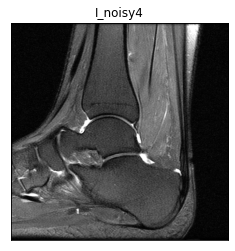

I_noisy1


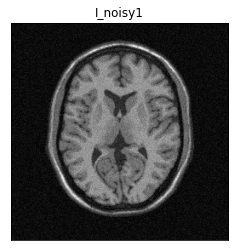

I_noisy2


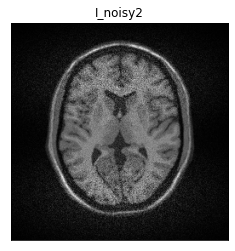

I_noisy3


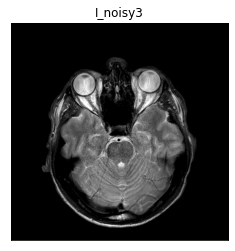

I_noisefree


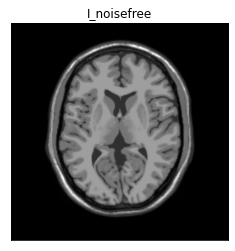

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os

if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate

#TODO Samodzielna
mat = loadmat('MR_data.mat')
keys = list(mat.keys())
keys = keys[3:]
for k in keys:
  print(k)
  plt.imshow(mat[k],cmap = 'gray')
  plt.title(k)
  plt.xticks([])
  plt.yticks([])
  plt.show()

### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

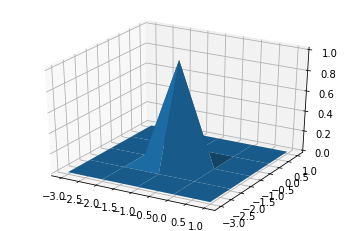

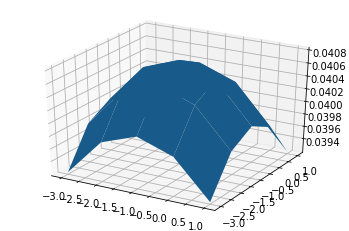

In [ ]:
#TODO Samodzielna
def gausian_filter(size,sigma):
  filter = np.empty((size,size))
  for j in range(size):
    for i in range(size):
      filter[i,j] = np.exp(-((i-size//2)**2+(j-size//2)**2)/(2*sigma**2))
  return filter


def mesh(fun, size):
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  X = np.arange(-size//2, size//2, 1)
  Y = np.arange(-size//2, size//2, 1)
  X, Y = np.meshgrid(X, Y)
  Z = fun
  ax.plot_surface(X, Y, Z)  
  plt.show()

mesh(gausian_filter(5,0.1),5)
mesh(gausian_filter(5,10),5)

Funkcja generująca filtry z rozkładem gaussa działa poprawnie

Text(0.5, 1.0, 'Obraz po filtracji')

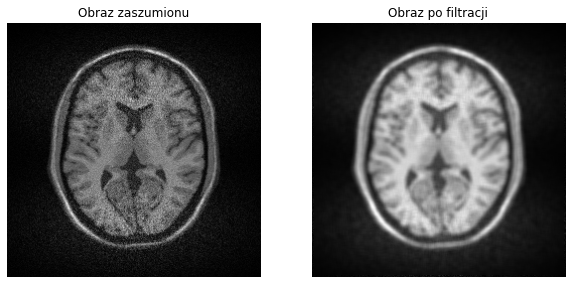

In [ ]:
def calculate_pixel(context,filter):
  return np.sum(np.multiply(context,filter/filter.sum()))


def convolution(im,filter):
  X,Y = im.shape
  n,m = filter.shape
  Iconv = Im.copy()
  for j in range(m//2,Y-m//2):
    for i in range(n//2,X-n//2):
        context = im[i-n//2:i+n//2+1,j-m//2:j+m//2+1]
        Iconv[i,j] = calculate_pixel(context,filter)
  return Iconv

Im = mat['I_noisy2']

f,axs = plt.subplots(1,2)
f.set_size_inches(10,5)
axs[0].imshow(Im,cmap = 'gray')
axs[0].axis('off')
axs[0].set_title('Obraz zaszumionu')
axs[1].imshow(convolution(Im,gausian_filter(5,20)),cmap =  'gray')
axs[1].axis('off')
axs[1].set_title('Obraz po filtracji')


### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gausowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

Text(0.5, 1.0, 'Obraz po filtracji')

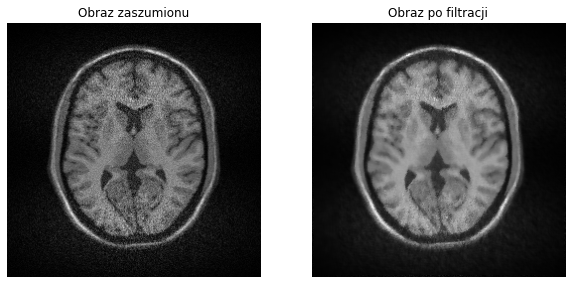

In [ ]:
def calculate_pixel_bilatral(context,filter,sigma_r):
  distance = np.empty(context.shape)
  m,n = context.shape
  for j in range(n):
    for i in range(j):
      distance[i,j] = np.exp((-abs(context[i,j]-context[m//2+1,n//2+1])**2)/(2*sigma_r**2))
  return np.sum(np.multiply(np.multiply(distance,filter),context))/np.multiply(distance,filter).sum()

def bilatral_filtration(im,filter,sigma_r):
  X,Y = im.shape
  n,m = filter.shape
  IBilateral = im.copy()

  for j in range(m//2,Y-m//2):
    for i in range(n//2,X-n//2):
      context = im[i-n//2:i+n//2+1,j-m//2:j+m//2+1]
      IBilateral[i,j] = calculate_pixel_bilatral(context,filter,sigma_r)
  return IBilateral

Im = mat['I_noisy2']

f,axs = plt.subplots(1,2)
f.set_size_inches(10,5)
axs[0].imshow(Im,cmap = 'gray')
axs[0].axis('off')
axs[0].set_title('Obraz zaszumionu')
axs[1].imshow(bilatral_filtration(Im,gausian_filter(5,20),30),cmap =  'gray')
axs[1].axis('off')
axs[1].set_title('Obraz po filtracji')

Filtr ten dużo lepiej radzi sobie z filtrowaniem niz normalny zaimplementowany w poprzednim przykładzie. Pomimo zastosowania filtru gaussa o tym samym rozkladzie i rozmiarze ostrość krawędzi została zachowana oraz szumy zostały wyeliminowane.